In [1]:
## In this notebook we will try to solve MNIST digit classification problem.
## Even with just 1 hidden units and 10 epochs, it takes around 30 seconds.
## With 400 pixel values, even with 1 hidden unit, we are talking about (400 + 1 + 10 + 10)
## independent variables. With 25 hidden units program just takes too much time to execute

In [5]:
import numpy as np
import yodf as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
import time

In [6]:
def to_categorical(y):
    k_unique = np.unique(y)
    k = len(np.unique(y))
    class_map = {}
    for i in range(k):
        class_map[k_unique[i]] = i
        
    c = np.zeros((y.shape[0], k), dtype=np.int)
    for i in range(y.shape[0]):
        c[i][class_map[y[i][0]]] = 1
    return c

def random_initialize_weights(shape):
    np.random.seed(100)
    t = np.random.random(shape)
    epsilon_init = 0.12
    return t*2*epsilon_init - epsilon_init

def sigmoid(x):
    return 1/(1+np.e**-x)

def predict(X, theta0, b0, theta1, b1):
    X1 = sigmoid(X.dot(theta0) + b0)
    h = sigmoid(X1.dot(theta1) + b1)
    return h

data = loadmat('ex4data1.mat')
X = data['X']
y_original = data['y']
y = to_categorical(y_original)
print(X.shape, y.shape)
input_layer_size = 400
hidden_layer_size = 1
# number of output units
K = 10

(5000, 400) (5000, 10)


(5000, 400) (400, 1) (1, 1) (1, 10) (1, 10)
Execution Time for epoch 1= 2.238 seconds.
Execution Time for epoch 2= 2.192 seconds.
Execution Time for epoch 3= 2.343 seconds.
Execution Time for epoch 4= 2.194 seconds.
Execution Time for epoch 5= 2.221 seconds.
Execution Time for epoch 6= 2.221 seconds.
Execution Time for epoch 7= 2.222 seconds.
Execution Time for epoch 8= 2.219 seconds.
Execution Time for epoch 9= 2.203 seconds.
Execution Time for epoch 10= 2.198 seconds.
Total Execution Time = 22.252 seconds.


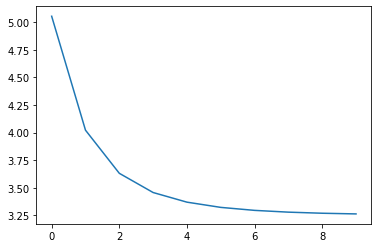

Accuracy 10.0
10.863195489820855 0.25081486875221193 -8.97097119831306 -11.616885840551852


In [7]:
m = X.shape[0]

W0 = random_initialize_weights((input_layer_size, hidden_layer_size))
B0 = random_initialize_weights((1, hidden_layer_size))
W1 = random_initialize_weights((hidden_layer_size, K))
B1 = random_initialize_weights((1, K))

print(X.shape, W0.shape, B0.shape, W1.shape, B1.shape)

W0 = tf.Variable(random_initialize_weights((input_layer_size, hidden_layer_size)))
B0 = tf.Variable(random_initialize_weights((1, hidden_layer_size)))

W1 = tf.Variable(random_initialize_weights((hidden_layer_size, K)))
B1 = tf.Variable(random_initialize_weights((1, K)))

X1 = tf.sigmoid(tf.matmul(X, W0) + B0)
h = tf.sigmoid(tf.matmul(X1, W1) + B1)

cost = tf.log(h)*y + tf.log(1-h)*(1-y)
cost = -1/m*tf.reduce_sum(cost)

learning_rate = 1
iterations = 10

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

start_time = time.time()
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    costs = []
    for i in range(iterations):
        start_epoch_time = time.time()
        _, W0_final, B0_final, W1_final, B1_final, cost_final = s.run([train, W0, B0, W1, B1, cost])
        costs.append(cost_final)
        end_epoch_time = time.time()
        print(f"Execution Time for epoch {i+1}= {end_epoch_time-start_epoch_time:0.3f} seconds.")

end_time = time.time()
print(f"Total Execution Time = {end_time-start_time:0.3f} seconds.")

plt.plot(costs)
plt.show()

y_predicted = predict(X, W0_final, B0_final, W1_final, B1_final)

a = np.argmax(y, axis=1)
b = np.argmax(y_predicted, axis=1)
print(f"Accuracy {np.mean(a == b)*100}")

## For sure, not the execution time :-), but results obtained with Tensorflow are identical
## 10.863195489820853 0.2508148687522118 -8.970971198313057 -11.616885840551856
print(np.sum(W0_final), np.sum(B0_final), np.sum(W1_final), np.sum(B1_final))